## Курсовой проект по теме "Библиотеки Python для Data Science: продолжение"

# Версия 3.0

**Содержание**

* [Подключение библиотек](#lib)
* [Пути к директориям](#dir)
* [Загрузка и обзор данных](#load_data)
* [Обзор целевой переменной](#target)
* [Обзор признаков](#featur)
* [Обработка признаков](#null)
* [Поиск выбросов](#anom)
* [Кодирование признаков](#encod)
* [Проверка на корреляции](#corr)
* [Обзор признака Credit_Score](#score)
* [Подготовка данных к моделированию, скалирование](#scal)
* [Построение и оценка базовых моделей](#model)
* [Выбор лучшей модели и подбор гиперпараметров](#best)

### Подключение библиотек<a class="anchor" id="lib"></a>

In [1]:
import numpy as np
import pandas as pd
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np
import pickle
import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Пути к директориям и файлам<a class="anchor" id="dir"></a>

In [2]:
# input
DATASET_PATH_TRAIN = 'course_project_train.csv'
DATASET_PATH_TEST = 'course_project_test.csv'

# output
PREP_DATASET_PATH = 'course_project_data_prep.csv'

### Загрузка и обзор данных<a class="anchor" id="load_data"></a>

In [3]:
df_train = pd.read_csv(DATASET_PATH_TRAIN)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [4]:
df_test = pd.read_csv(DATASET_PATH_TEST)
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [5]:
df_train.shape, df_test.shape

((7500, 17), (2500, 16))

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [7]:
df_train.iloc[0]

Home Ownership                            Own Home
Annual Income                               482087
Years in current job                           NaN
Tax Liens                                        0
Number of Open Accounts                         11
Years of Credit History                       26.3
Maximum Open Credit                         685960
Number of Credit Problems                        1
Months since last delinquent                   NaN
Bankruptcies                                     1
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                          1e+08
Current Credit Balance                       47386
Monthly Debt                                  7914
Credit Score                                   749
Credit Default                                   0
Name: 0, dtype: object

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

### Обзор целевой переменной<a class="anchor" id="target"></a>

In [8]:
df_train['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

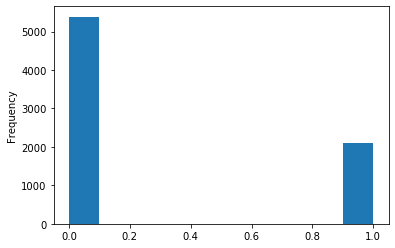

In [9]:
df_train['Credit Default'].astype(int).plot.hist()

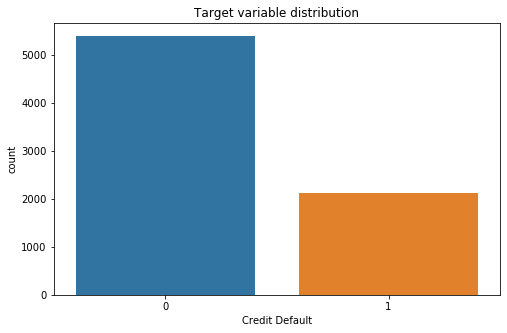

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df_train['Credit Default'], data=df_train)
plt.title('Target variable distribution')
plt.show()

### Обзор признаков<a class="anchor" id="featur"></a>

In [11]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns

In [12]:
missing_values_tr = missing_values_table(df_train)
missing_values_tr

Your selected dataframe has 17 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,4081,54.4
Annual Income,1557,20.8
Credit Score,1557,20.8
Years in current job,371,4.9
Bankruptcies,14,0.2


In [13]:
missing_values_ts = missing_values_table(df_test)
missing_values_ts

Your selected dataframe has 16 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,1358,54.3
Annual Income,513,20.5
Credit Score,513,20.5
Years in current job,86,3.4
Bankruptcies,3,0.1


**Убедимся, что пропуски среднего дохода и кредитного рейтинга в одних и тех же строках**

In [14]:
df_train[df_train['Annual Income'].isnull() & df_train['Credit Score'].isnull()].iloc[:, [1,15]]

,Annual Income,Credit Score
5,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
16,NaN,NaN
...,...,...
7482,NaN,NaN
7492,NaN,NaN
7494,NaN,NaN
7498,NaN,NaN


In [15]:
df_test[df_test['Annual Income'].isnull() & df_test['Credit Score'].isnull()].iloc[:, [1,15]]

,Annual Income,Credit Score
0,NaN,NaN
8,NaN,NaN
16,NaN,NaN
20,NaN,NaN
27,NaN,NaN
...,...,...
2469,NaN,NaN
2475,NaN,NaN
2479,NaN,NaN
2487,NaN,NaN


**Обзор номинатвных признаков**

In [16]:
df_train.dtypes.value_counts()

float64    12
object      4
int64       1
dtype: int64

In [17]:
df_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

Home Ownership           4
Years in current job    11
Purpose                 15
Term                     2
dtype: int64

In [18]:
for cat_colname in df_train.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df_train[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

In [19]:
#df_train[df_train['Years in current job'].isnull()].iloc[:, [2,16]]

### Обработка признаков<a class="anchor" id="null"></a>

In [20]:
#df_train[df_train['Years in current job'].isnull() & df_train['Credit Default']==1].iloc[:, :]

**Оработка Annual Income, Credit Score**

In [21]:
df_train['Annual Income'].median()

1168386.0

In [22]:
df_train['Credit Score'].median()

731.0

In [23]:
df_train.loc[df_train['Annual Income'].isnull(), 'Annual Income'] = df_train['Annual Income'].median()

In [24]:
df_train.loc[df_train['Credit Score'].isnull(), 'Credit Score'] = df_train['Credit Score'].median()

In [25]:
df_test.loc[df_test['Annual Income'].isnull(), 'Annual Income'] = df_train['Annual Income'].median()
df_test.loc[df_test['Credit Score'].isnull(), 'Credit Score'] = df_train['Credit Score'].median()

**Оработка Months since last delinquent**

In [26]:
df_train['Months since last delinquent'].value_counts(dropna = False)

NaN      4081
14.0       76
29.0       71
8.0        68
33.0       68
         ... 
84.0        1
92.0        1
86.0        1
118.0       1
91.0        1
Name: Months since last delinquent, Length: 90, dtype: int64

In [27]:
df_train['Months since last delinquent'].describe()

count    3419.000000
mean       34.692600
std        21.688806
min         0.000000
25%        16.000000
50%        32.000000
75%        50.000000
max       118.000000
Name: Months since last delinquent, dtype: float64

In [28]:
#df_train[df_train['Months since last delinquent'].isnull()].iloc[:, [2,16]]['Credit Default'].sum()

In [29]:
#1130/4081

In [30]:
#df_train[df_train['Months since last delinquent'].notnull()].iloc[:, [2,16]]['Credit Default'].sum()

In [31]:
#983/3419

In [32]:
df_train.loc[df_train['Months since last delinquent'].notnull(), 'Months since last delinquent'] = 1

In [33]:
df_train.loc[df_train['Months since last delinquent'].isnull(), 'Months since last delinquent'] = 0

In [34]:
df_test.loc[df_test['Months since last delinquent'].notnull(), 'Months since last delinquent'] = 1

In [35]:
df_test.loc[df_test['Months since last delinquent'].isnull(), 'Months since last delinquent'] = 0

**Оработка Bankruptcies**

In [36]:
df_train['Bankruptcies'].value_counts(dropna = False)

0.0    6660
1.0     786
2.0      31
NaN      14
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

In [37]:
df_train[df_train['Bankruptcies']==0].iloc[:, [2,16]]['Credit Default'].sum()

1878

In [38]:
df_train['Bankruptcies'].mode()

0    0.0
dtype: float64

In [39]:
df_train.loc[df_train['Bankruptcies'].isnull(), 'Bankruptcies'] = df_train['Bankruptcies'].mode()[0]

In [40]:
df_test.loc[df_test['Bankruptcies'].isnull(), 'Bankruptcies'] = df_train['Bankruptcies'].mode()[0]

**Оработка Years in current job**

##### создадим новый столбец и поставим стаж в integer

In [41]:
df_train['Year']=df_train['Years in current job']

In [42]:
df_train.loc[df_train['Year'].isnull(), 'Year'] = '0 years' #ожидаю, что средний доход в NaN будет меньше

In [43]:
df_train['Year'].value_counts(dropna = False)

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
0 years       371
8 years       339
9 years       259
Name: Year, dtype: int64

In [44]:
df_train['Year']=df_train['Year'].map({'< 1 year':1,
 '1 year':2,                                                     
 '2 years':3,
 '3 years':4,
 '4 years':5,
 '5 years':6,
 '6 years':7,
 '7 years':8,
 '8 years':9,
 '9 years':10,
 '10+ years':11,
 '0 years':0})

In [45]:
df_train['Year'].value_counts(dropna = False)

11    2332
3      705
4      620
1      563
6      516
2      504
5      469
7      426
8      396
0      371
9      339
10     259
Name: Year, dtype: int64

In [46]:
df_train.groupby(['Year'])['Annual Income'].agg(['sum', 'count', 'mean'])

,sum,count,mean
Year,,,
0,3.610646e+08,371,9.732200e+05
1,6.740440e+08,563,1.197236e+06
2,6.288357e+08,504,1.247690e+06
3,9.109892e+08,705,1.292183e+06
4,8.361689e+08,620,1.348660e+06
5,6.232116e+08,469,1.328809e+06
6,6.671974e+08,516,1.293018e+06
7,5.480462e+08,426,1.286493e+06
8,5.160939e+08,396,1.303267e+06


In [47]:
df_train.loc[df_train['Years in current job'].isnull()]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Year
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,0.0,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0,0
22,Rent,463790.0,NaN,0.0,6.0,28.3,288442.0,0.0,0.0,0.0,debt consolidation,Short Term,99999999.0,157700.0,5063.0,738.0,0,0
24,Own Home,1168386.0,NaN,0.0,12.0,25.0,1216336.0,0.0,1.0,0.0,debt consolidation,Short Term,467676.0,818311.0,37530.0,731.0,0,0
58,Home Mortgage,992845.0,NaN,0.0,17.0,21.2,1132054.0,0.0,0.0,0.0,debt consolidation,Short Term,207812.0,294291.0,25483.0,739.0,0,0
60,Home Mortgage,1630029.0,NaN,0.0,10.0,17.3,697114.0,0.0,0.0,0.0,debt consolidation,Long Term,230362.0,260680.0,6181.0,714.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,Rent,408709.0,NaN,0.0,13.0,14.0,403106.0,1.0,0.0,1.0,debt consolidation,Short Term,111892.0,143773.0,3242.0,720.0,1,0
7409,Home Mortgage,1939349.0,NaN,0.0,10.0,17.5,322652.0,0.0,1.0,0.0,home improvements,Short Term,126720.0,56563.0,22949.0,750.0,0,0
7413,Rent,1784537.0,NaN,0.0,11.0,20.1,269676.0,0.0,1.0,0.0,debt consolidation,Short Term,449196.0,204250.0,22307.0,736.0,1,0
7439,Home Mortgage,671270.0,NaN,0.0,12.0,20.6,263406.0,0.0,0.0,0.0,debt consolidation,Short Term,99999999.0,151278.0,6937.0,737.0,0,0


In [48]:
df_train.loc[df_train['Years in current job'].isnull(), 'Years in current job'] = '0 years' #знаю, что средний доход в NaN будет меньше

In [49]:
df_test.loc[df_test['Years in current job'].isnull(), 'Years in current job'] = '0 years'

In [50]:
missing_values_tr = missing_values_table(df_train)
missing_values_tr

Your selected dataframe has 18 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [51]:
missing_values_ts = missing_values_table(df_test)
missing_values_ts

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


**Обработка выбросов**
### Поиск выбросов<a class="anchor" id="anom"></a>

In [52]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Year
count,7.500000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000
mean,1.325286e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,0.455867,0.116933,1.187318e+07,2.898332e+05,18314.454133,1063.877333,0.281733,6.540000
std,7.567551e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,0.498082,0.346904,3.192612e+07,3.178714e+05,11926.764673,1438.335832,0.449874,3.831826
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000,0.000000
25%,9.311330e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,0.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,718.000000,0.000000,3.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,0.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000,7.000000
75%,1.499974e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,1.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,740.000000,1.000000,11.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,1.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000,11.000000


Text(0.5, 0, 'Annual Income')

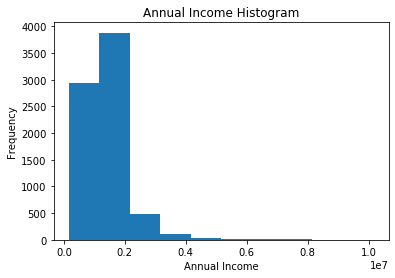

In [53]:
df_train['Annual Income'].plot.hist(title='Annual Income Histogram')
plt.xlabel('Annual Income')

Text(0.5, 0, 'Annual Income')

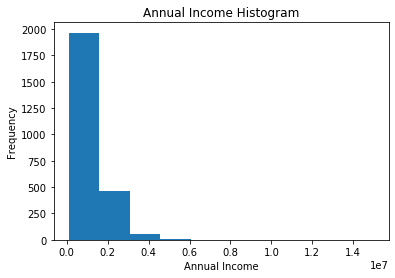

In [54]:
df_test['Annual Income'].plot.hist(title='Annual Income Histogram')
plt.xlabel('Annual Income')

Text(0.5, 0, 'Tax Liens')

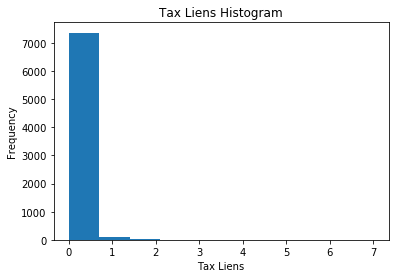

In [55]:
df_train['Tax Liens'].plot.hist(title='Tax Liens Histogram')
plt.xlabel('Tax Liens')

Text(0.5, 0, 'Tax Liens')

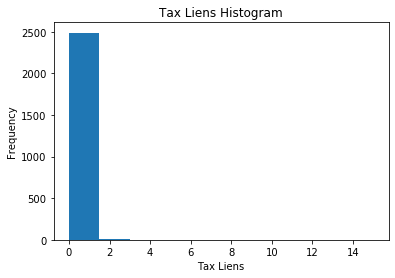

In [56]:
df_test['Tax Liens'].plot.hist(title='Tax Liens Histogram')
plt.xlabel('Tax Liens')

Text(0.5, 0, 'Number of Open Accounts')

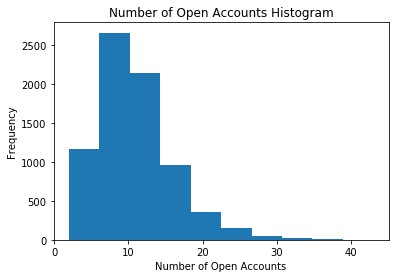

In [57]:
df_train['Number of Open Accounts'].plot.hist(title='Number of Open Accounts Histogram')
plt.xlabel('Number of Open Accounts')

Text(0.5, 0, 'Number of Open Accounts')

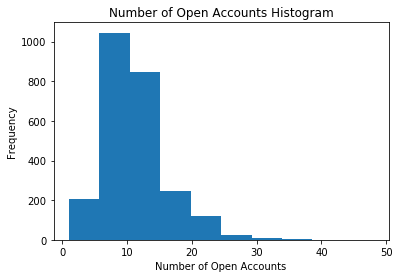

In [58]:
df_test['Number of Open Accounts'].plot.hist(title='Number of Open Accounts Histogram')
plt.xlabel('Number of Open Accounts')

Text(0.5, 0, 'Years of Credit History')

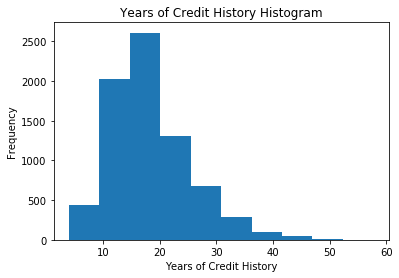

In [59]:
df_train['Years of Credit History'].plot.hist(title='Years of Credit History Histogram')
plt.xlabel('Years of Credit History')

Text(0.5, 0, 'Years of Credit History')

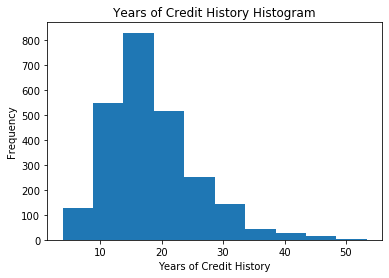

In [60]:
df_test['Years of Credit History'].plot.hist(title='Years of Credit History Histogram')
plt.xlabel('Years of Credit History')

Text(0.5, 0, 'Maximum Open Credit')

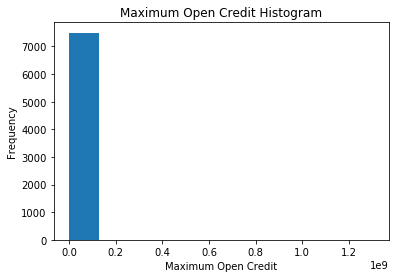

In [61]:
df_train['Maximum Open Credit'].plot.hist(title='Maximum Open Credit Histogram')
plt.xlabel('Maximum Open Credit')

Text(0.5, 0, 'Maximum Open Credit')

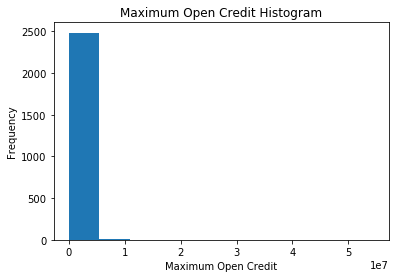

In [62]:
df_test['Maximum Open Credit'].plot.hist(title='Maximum Open Credit Histogram')
plt.xlabel('Maximum Open Credit')

Text(0.5, 0, 'Number of Credit Problems')

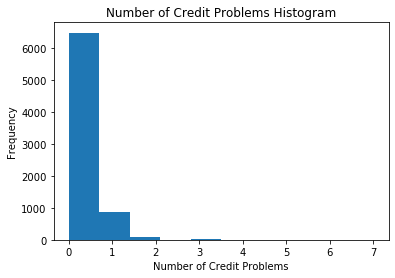

In [63]:
df_train['Number of Credit Problems'].plot.hist(title='Number of Credit Problems Histogram')
plt.xlabel('Number of Credit Problems')

Text(0.5, 0, 'Number of Credit Problems')

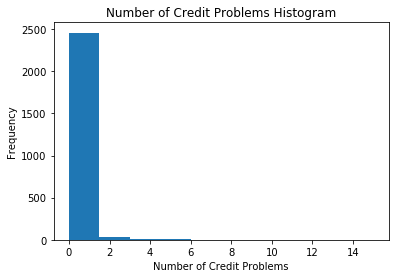

In [64]:
df_test['Number of Credit Problems'].plot.hist(title='Number of Credit Problems Histogram')
plt.xlabel('Number of Credit Problems')

Text(0.5, 0, 'Months since last delinquent')

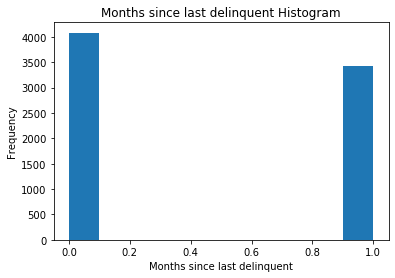

In [65]:
df_train['Months since last delinquent'].plot.hist(title='Months since last delinquent Histogram')
plt.xlabel('Months since last delinquent')

In [66]:
df_train['Months since last delinquent'].value_counts(dropna = False)

0.0    4081
1.0    3419
Name: Months since last delinquent, dtype: int64

Text(0.5, 0, 'Months since last delinquent')

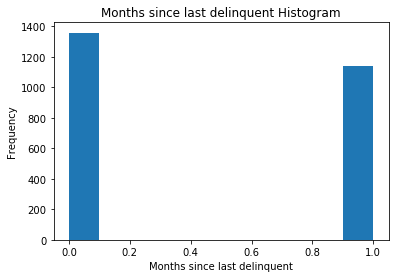

In [67]:
df_test['Months since last delinquent'].plot.hist(title='Months since last delinquent Histogram')
plt.xlabel('Months since last delinquent')

In [68]:
df_test['Months since last delinquent'].value_counts(dropna = False)

0.0    1358
1.0    1142
Name: Months since last delinquent, dtype: int64

Text(0.5, 0, 'Bankruptcies')

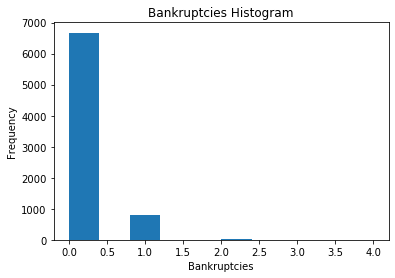

In [69]:
df_train['Bankruptcies'].plot.hist(title='Bankruptcies Histogram')
plt.xlabel('Bankruptcies')

Text(0.5, 0, 'Bankruptcies')

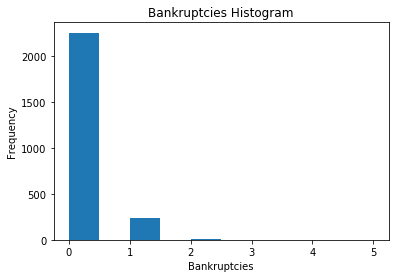

In [70]:
df_test['Bankruptcies'].plot.hist(title='Bankruptcies Histogram')
plt.xlabel('Bankruptcies')

Text(0.5, 0, 'Current Loan Amount')

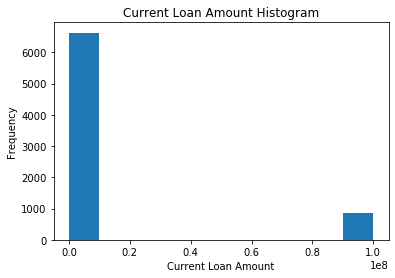

In [71]:
df_train['Current Loan Amount'].plot.hist(title='Current Loan Amount Histogram')
plt.xlabel('Current Loan Amount')

Text(0.5, 0, 'Current Loan Amount')

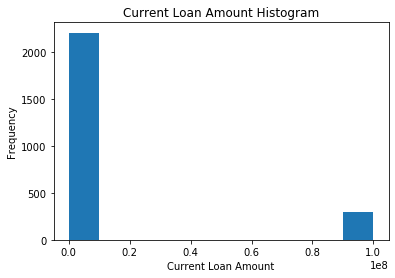

In [72]:
df_test['Current Loan Amount'].plot.hist(title='Current Loan Amount Histogram')
plt.xlabel('Current Loan Amount')

In [73]:
df_train['Current Loan Amount'].value_counts(dropna = False)

99999999.0    870
89298.0         6
218064.0        6
216106.0        5
270226.0        5
             ... 
490006.0        1
404756.0        1
194414.0        1
420376.0        1
33792.0         1
Name: Current Loan Amount, Length: 5386, dtype: int64

In [74]:
df_train[df_train['Current Loan Amount']==99999999.0].iloc[:, :]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Year
0,Own Home,482087.0,0 years,0.0,11.0,26.3,685960.0,1.0,0.0,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0,0
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,0.0,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0,9
6,Home Mortgage,1511108.0,10+ years,0.0,9.0,20.3,388124.0,0.0,1.0,0.0,home improvements,Short Term,99999999.0,51623.0,2317.0,745.0,0,11
22,Rent,463790.0,0 years,0.0,6.0,28.3,288442.0,0.0,0.0,0.0,debt consolidation,Short Term,99999999.0,157700.0,5063.0,738.0,0,0
27,Rent,1004055.0,8 years,0.0,7.0,14.5,328394.0,0.0,0.0,0.0,debt consolidation,Short Term,99999999.0,195966.0,6041.0,734.0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7441,Rent,1406836.0,1 year,0.0,12.0,22.6,2383260.0,0.0,0.0,0.0,debt consolidation,Short Term,99999999.0,461054.0,7386.0,747.0,0,2
7445,Home Mortgage,1564384.0,6 years,0.0,21.0,17.3,1545016.0,0.0,0.0,0.0,other,Long Term,99999999.0,1043442.0,32461.0,728.0,0,7
7464,Home Mortgage,1159152.0,6 years,0.0,14.0,22.0,389356.0,1.0,1.0,1.0,debt consolidation,Short Term,99999999.0,49438.0,18257.0,737.0,0,7
7475,Rent,848426.0,10+ years,0.0,8.0,20.1,526306.0,0.0,1.0,0.0,debt consolidation,Short Term,99999999.0,83638.0,16473.0,742.0,0,11


Text(0.5, 0, 'Current Loan Amount')

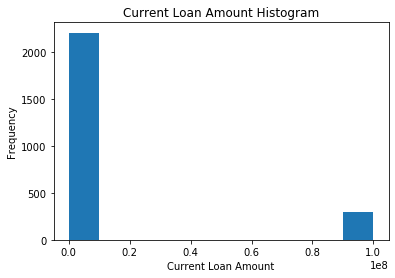

In [75]:
df_test['Current Loan Amount'].plot.hist(title='Current Loan Amount Histogram')
plt.xlabel('Current Loan Amount')

In [76]:
df_test['Current Loan Amount'].value_counts(dropna = False)

99999999.0    297
110462.0        3
396506.0        3
327404.0        3
258676.0        3
             ... 
543290.0        1
105578.0        1
43054.0         1
162448.0        1
450560.0        1
Name: Current Loan Amount, Length: 2026, dtype: int64

**Странное знаечение 99999999.0, но пока оставим**

Text(0.5, 0, 'Current Credit Balance')

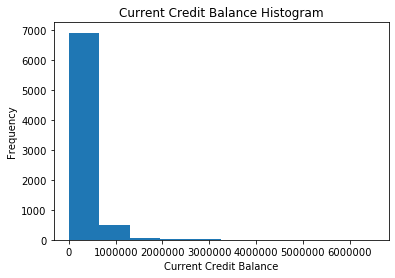

In [77]:
df_train['Current Credit Balance'].plot.hist(title='Current Credit Balance Histogram')
plt.xlabel('Current Credit Balance')

Text(0.5, 0, 'Current Credit Balance')

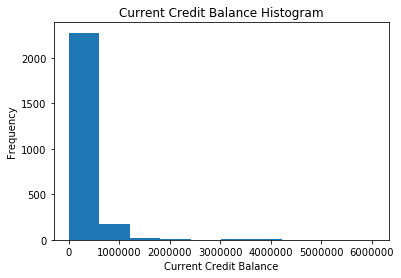

In [78]:
df_test['Current Credit Balance'].plot.hist(title='Current Credit Balance Histogram')
plt.xlabel('Current Credit Balance')

Text(0.5, 0, 'Monthly Debt Balance')

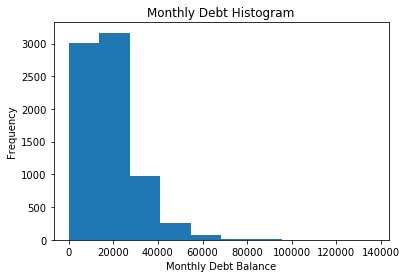

In [79]:
df_train['Monthly Debt'].plot.hist(title='Monthly Debt Histogram')
plt.xlabel('Monthly Debt Balance')

Text(0.5, 0, 'Monthly Debt Balance')

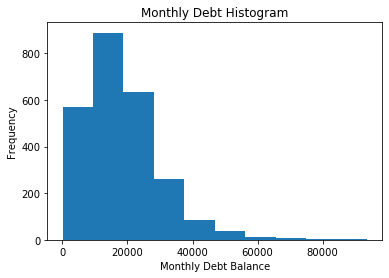

In [80]:
df_test['Monthly Debt'].plot.hist(title='Monthly Debt Histogram')
plt.xlabel('Monthly Debt Balance')

Text(0.5, 0, 'Credit Score Balance')

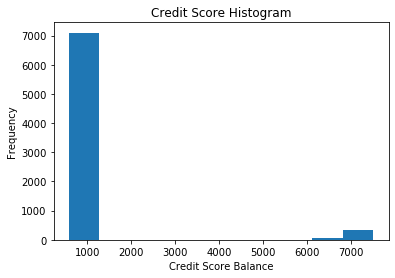

In [81]:
df_train['Credit Score'].plot.hist(title='Credit Score Histogram')
plt.xlabel('Credit Score Balance')

In [82]:
df_train['Credit Score'].value_counts(dropna = False)

731.0     1651
740.0      169
747.0      168
748.0      157
745.0      152
          ... 
602.0        1
616.0        1
585.0        1
620.0        1
7010.0       1
Name: Credit Score, Length: 268, dtype: int64

In [83]:
df_test['Credit Score'].value_counts(dropna = False)

731.0     547
746.0      56
739.0      55
741.0      54
740.0      50
         ... 
613.0       1
616.0       1
6880.0      1
6890.0      1
6670.0      1
Name: Credit Score, Length: 211, dtype: int64

In [84]:
df_train[df_train['Credit Score']>1000].iloc[:, :]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Year
69,Home Mortgage,1408527.0,2 years,0.0,12.0,17.5,700062.0,0.0,1.0,0.0,other,Long Term,525998.0,174135.0,9320.0,6470.0,1,3
87,Home Mortgage,1533566.0,7 years,0.0,11.0,14.8,715462.0,0.0,1.0,0.0,debt consolidation,Short Term,210826.0,285475.0,18147.0,7440.0,1,8
94,Rent,1049294.0,3 years,0.0,5.0,6.1,249810.0,0.0,0.0,0.0,business loan,Short Term,337502.0,119529.0,15215.0,7010.0,1,4
96,Rent,757568.0,5 years,0.0,13.0,11.4,383548.0,0.0,0.0,0.0,debt consolidation,Short Term,210518.0,276583.0,11553.0,7320.0,1,6
116,Home Mortgage,1039984.0,0 years,0.0,10.0,23.8,147950.0,0.0,1.0,0.0,debt consolidation,Short Term,224246.0,95456.0,13780.0,7390.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422,Rent,694868.0,1 year,0.0,4.0,7.8,143066.0,0.0,0.0,0.0,debt consolidation,Long Term,244178.0,122075.0,4268.0,6690.0,1,2
7433,Rent,2011758.0,< 1 year,0.0,4.0,14.9,22176.0,0.0,1.0,0.0,buy a car,Long Term,106480.0,18791.0,12590.0,6060.0,1,1
7450,Home Mortgage,1432277.0,10+ years,0.0,16.0,22.8,825176.0,0.0,0.0,0.0,debt consolidation,Short Term,187924.0,458242.0,27094.0,7290.0,1,11
7460,Rent,769462.0,5 years,0.0,8.0,17.0,313786.0,0.0,1.0,0.0,debt consolidation,Short Term,109186.0,45524.0,4585.0,7470.0,1,6


**Credit Score > 1000 явно глюки, но при этом дефолт 100%, возможно это явный признак ,так что не обрабатываем и этот выброс** 


**Удаляем вспомогательный столбец**

In [85]:
df_train = df_train.drop(['Year'], axis=1).copy()

In [86]:
df_train

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,0 years,0.0,11.0,26.3,685960.0,1.0,0.0,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,0.0,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,0.0,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,0.0,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,0.0,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,402192.0,< 1 year,0.0,3.0,8.5,107866.0,0.0,0.0,0.0,other,Short Term,129360.0,73492.0,1900.0,697.0,0
7496,Home Mortgage,1533984.0,1 year,0.0,10.0,26.5,686312.0,0.0,1.0,0.0,debt consolidation,Long Term,444048.0,456399.0,12783.0,7410.0,1
7497,Rent,1878910.0,6 years,0.0,12.0,32.1,1778920.0,0.0,0.0,0.0,buy a car,Short Term,99999999.0,477812.0,12479.0,748.0,0
7498,Home Mortgage,1168386.0,0 years,0.0,21.0,26.5,1141250.0,0.0,0.0,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,731.0,0


**Проверка на пропуски**

In [87]:
len(df_train) - df_train.count()

Home Ownership                  0
Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
Credit Default                  0
dtype: int64

In [88]:
len(df_test) - df_test.count()

Home Ownership                  0
Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
dtype: int64

In [89]:
df_train.loc[df_train['Years in current job']=='< 1 year', 'Years in current job'] = 'less 1 year'

In [90]:
df_test.loc[df_test['Years in current job']=='< 1 year', 'Years in current job'] = 'less 1 year'

### Кодирование признаков<a class="anchor" id="encod"></a>

**Будем кодировать кат. признаки, где уникальных больше двух - one-hot_encoding, где два - label_encoding** 

In [91]:
categorical_features = df_train.select_dtypes(include=['object']).copy()
print(categorical_features.columns)

Index(['Home Ownership', 'Years in current job', 'Purpose', 'Term'], dtype='object')


In [92]:
numerical_features = df_train.select_dtypes(exclude=['object']).copy()
print(numerical_features.columns)

Index(['Annual Income', 'Tax Liens', 'Number of Open Accounts',
       'Years of Credit History', 'Maximum Open Credit',
       'Number of Credit Problems', 'Months since last delinquent',
       'Bankruptcies', 'Current Loan Amount', 'Current Credit Balance',
       'Monthly Debt', 'Credit Score', 'Credit Default'],
      dtype='object')


In [93]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df_train:
    if df_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(df_train[col])
            # Transform both training and testing data
            df_train[col] = le.transform(df_train[col])
            df_test[col] = le.transform(df_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

1 columns were label encoded.


In [94]:
df_train

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,0 years,0.0,11.0,26.3,685960.0,1.0,0.0,1.0,debt consolidation,1,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,0.0,0.0,debt consolidation,0,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,0.0,0.0,debt consolidation,1,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,0.0,1.0,debt consolidation,1,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,0.0,0.0,debt consolidation,1,125840.0,93309.0,7180.0,719.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,402192.0,less 1 year,0.0,3.0,8.5,107866.0,0.0,0.0,0.0,other,1,129360.0,73492.0,1900.0,697.0,0
7496,Home Mortgage,1533984.0,1 year,0.0,10.0,26.5,686312.0,0.0,1.0,0.0,debt consolidation,0,444048.0,456399.0,12783.0,7410.0,1
7497,Rent,1878910.0,6 years,0.0,12.0,32.1,1778920.0,0.0,0.0,0.0,buy a car,1,99999999.0,477812.0,12479.0,748.0,0
7498,Home Mortgage,1168386.0,0 years,0.0,21.0,26.5,1141250.0,0.0,0.0,0.0,debt consolidation,1,615274.0,476064.0,37118.0,731.0,0


In [95]:
df_test

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,1168386.0,4 years,0.0,9.0,12.5,220968.0,0.0,1.0,0.0,debt consolidation,1,162470.0,105906.0,6813.0,731.0
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,1.0,0.0,educational expenses,1,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,0.0,0.0,debt consolidation,1,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,1.0,0.0,debt consolidation,1,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,0.0,0.0,debt consolidation,0,777634.0,425391.0,42605.0,706.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Home Mortgage,1020053.0,10+ years,0.0,14.0,29.1,559152.0,1.0,1.0,1.0,debt consolidation,1,99999999.0,162735.0,15046.0,745.0
2496,Home Mortgage,1168386.0,2 years,0.0,15.0,17.0,1737780.0,0.0,1.0,0.0,debt consolidation,1,468512.0,1439269.0,32996.0,731.0
2497,Home Mortgage,1171806.0,2 years,0.0,48.0,12.8,1706430.0,0.0,0.0,0.0,debt consolidation,1,430496.0,676438.0,36912.0,695.0
2498,Rent,723520.0,10+ years,0.0,14.0,28.8,945780.0,0.0,0.0,0.0,debt consolidation,1,257774.0,391248.0,13506.0,744.0


In [96]:
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [97]:
df_train

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Term,Current Loan Amount,...,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding
0,482087.0,0.0,11.0,26.3,685960.0,1.0,0.0,1.0,1,99999999.0,...,0,0,0,0,0,0,0,0,0,0
1,1025487.0,0.0,15.0,15.3,1181730.0,0.0,0.0,0.0,0,264968.0,...,0,0,0,0,0,0,0,0,0,0
2,751412.0,0.0,11.0,35.0,1182434.0,0.0,0.0,0.0,1,99999999.0,...,0,0,0,0,0,0,0,0,0,0
3,805068.0,0.0,8.0,22.5,147400.0,1.0,0.0,1.0,1,121396.0,...,0,0,0,0,0,0,0,0,0,0
4,776264.0,0.0,13.0,13.6,385836.0,1.0,0.0,0.0,1,125840.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,402192.0,0.0,3.0,8.5,107866.0,0.0,0.0,0.0,1,129360.0,...,0,0,0,0,1,0,0,0,0,0
7496,1533984.0,0.0,10.0,26.5,686312.0,0.0,1.0,0.0,0,444048.0,...,0,0,0,0,0,0,0,0,0,0
7497,1878910.0,0.0,12.0,32.1,1778920.0,0.0,0.0,0.0,1,99999999.0,...,0,0,0,0,0,0,0,0,0,0
7498,1168386.0,0.0,21.0,26.5,1141250.0,0.0,0.0,0.0,1,615274.0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
df_test

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Term,Current Loan Amount,...,Purpose_educational expenses,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding
0,1168386.0,0.0,9.0,12.5,220968.0,0.0,1.0,0.0,1,162470.0,...,0,0,0,0,0,0,0,0,0,0
1,231838.0,0.0,6.0,32.7,55946.0,0.0,1.0,0.0,1,78298.0,...,1,0,0,0,0,0,0,0,0,0
2,1152540.0,0.0,10.0,13.7,204600.0,0.0,0.0,0.0,1,200178.0,...,0,0,0,0,0,0,0,0,0,0
3,1220313.0,0.0,16.0,17.0,456302.0,0.0,1.0,0.0,1,217382.0,...,0,0,0,0,0,0,0,0,0,0
4,2340952.0,0.0,11.0,23.6,1207272.0,0.0,0.0,0.0,0,777634.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1020053.0,0.0,14.0,29.1,559152.0,1.0,1.0,1.0,1,99999999.0,...,0,0,0,0,0,0,0,0,0,0
2496,1168386.0,0.0,15.0,17.0,1737780.0,0.0,1.0,0.0,1,468512.0,...,0,0,0,0,0,0,0,0,0,0
2497,1171806.0,0.0,48.0,12.8,1706430.0,0.0,0.0,0.0,1,430496.0,...,0,0,0,0,0,0,0,0,0,0
2498,723520.0,0.0,14.0,28.8,945780.0,0.0,0.0,0.0,1,257774.0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
print('Training Features shape: ', df_train.shape)
print('Testing Features shape: ', df_test.shape)

Training Features shape:  (7500, 45)
Testing Features shape:  (2500, 43)


**Согласование данных в train и test**

In [100]:
df_train.columns

Index(['Annual Income', 'Tax Liens', 'Number of Open Accounts',
       'Years of Credit History', 'Maximum Open Credit',
       'Number of Credit Problems', 'Months since last delinquent',
       'Bankruptcies', 'Term', 'Current Loan Amount', 'Current Credit Balance',
       'Monthly Debt', 'Credit Score', 'Credit Default',
       'Home Ownership_Have Mortgage', 'Home Ownership_Home Mortgage',
       'Home Ownership_Own Home', 'Home Ownership_Rent',
       'Years in current job_0 years', 'Years in current job_1 year',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_3 years', 'Years in current job_4 years',
       'Years in current job_5 years', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_8 years',
       'Years in current job_9 years', 'Years in current job_less 1 year',
       'Purpose_business loan', 'Purpose_buy a car', 'Purpose_buy house',
       'Purpose_debt consolidation', 'Pur

In [101]:
df_test.columns

Index(['Annual Income', 'Tax Liens', 'Number of Open Accounts',
       'Years of Credit History', 'Maximum Open Credit',
       'Number of Credit Problems', 'Months since last delinquent',
       'Bankruptcies', 'Term', 'Current Loan Amount', 'Current Credit Balance',
       'Monthly Debt', 'Credit Score', 'Home Ownership_Have Mortgage',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Years in current job_0 years',
       'Years in current job_1 year', 'Years in current job_10+ years',
       'Years in current job_2 years', 'Years in current job_3 years',
       'Years in current job_4 years', 'Years in current job_5 years',
       'Years in current job_6 years', 'Years in current job_7 years',
       'Years in current job_8 years', 'Years in current job_9 years',
       'Years in current job_less 1 year', 'Purpose_business loan',
       'Purpose_buy a car', 'Purpose_buy house', 'Purpose_debt consolidation',
       'Purpose_educational e

In [102]:
train_labels = df_train['Credit Default']
df_train, df_test = df_train.align(df_test, join = 'inner', axis=1)
df_train['Credit Default'] = train_labels

print('Training Features shape: ', df_train.shape)
print('Testing Features shape: ', df_test.shape)

Training Features shape:  (7500, 44)
Testing Features shape:  (2500, 43)


### Проверка на корреляции<a class="anchor" id="corr"></a>

In [103]:
#correlations = df_train.corr()['Credit Default'].sort_values()

In [104]:
#print('Most Positive Correlations:\n', correlations.tail(15))
#print('\nMost Negative Correlations:\n', correlations.head(15))

In [105]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df_train.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = df_train.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES)

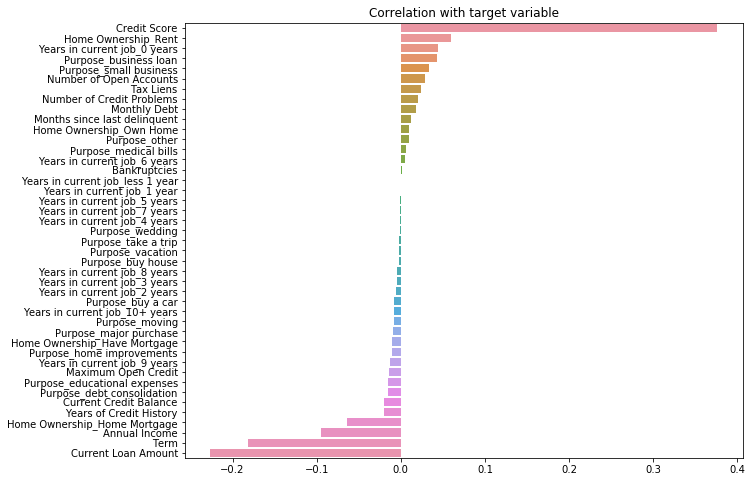

In [106]:
corr_with_target = df_train[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

**Рассмотрим матрицу корреляций**

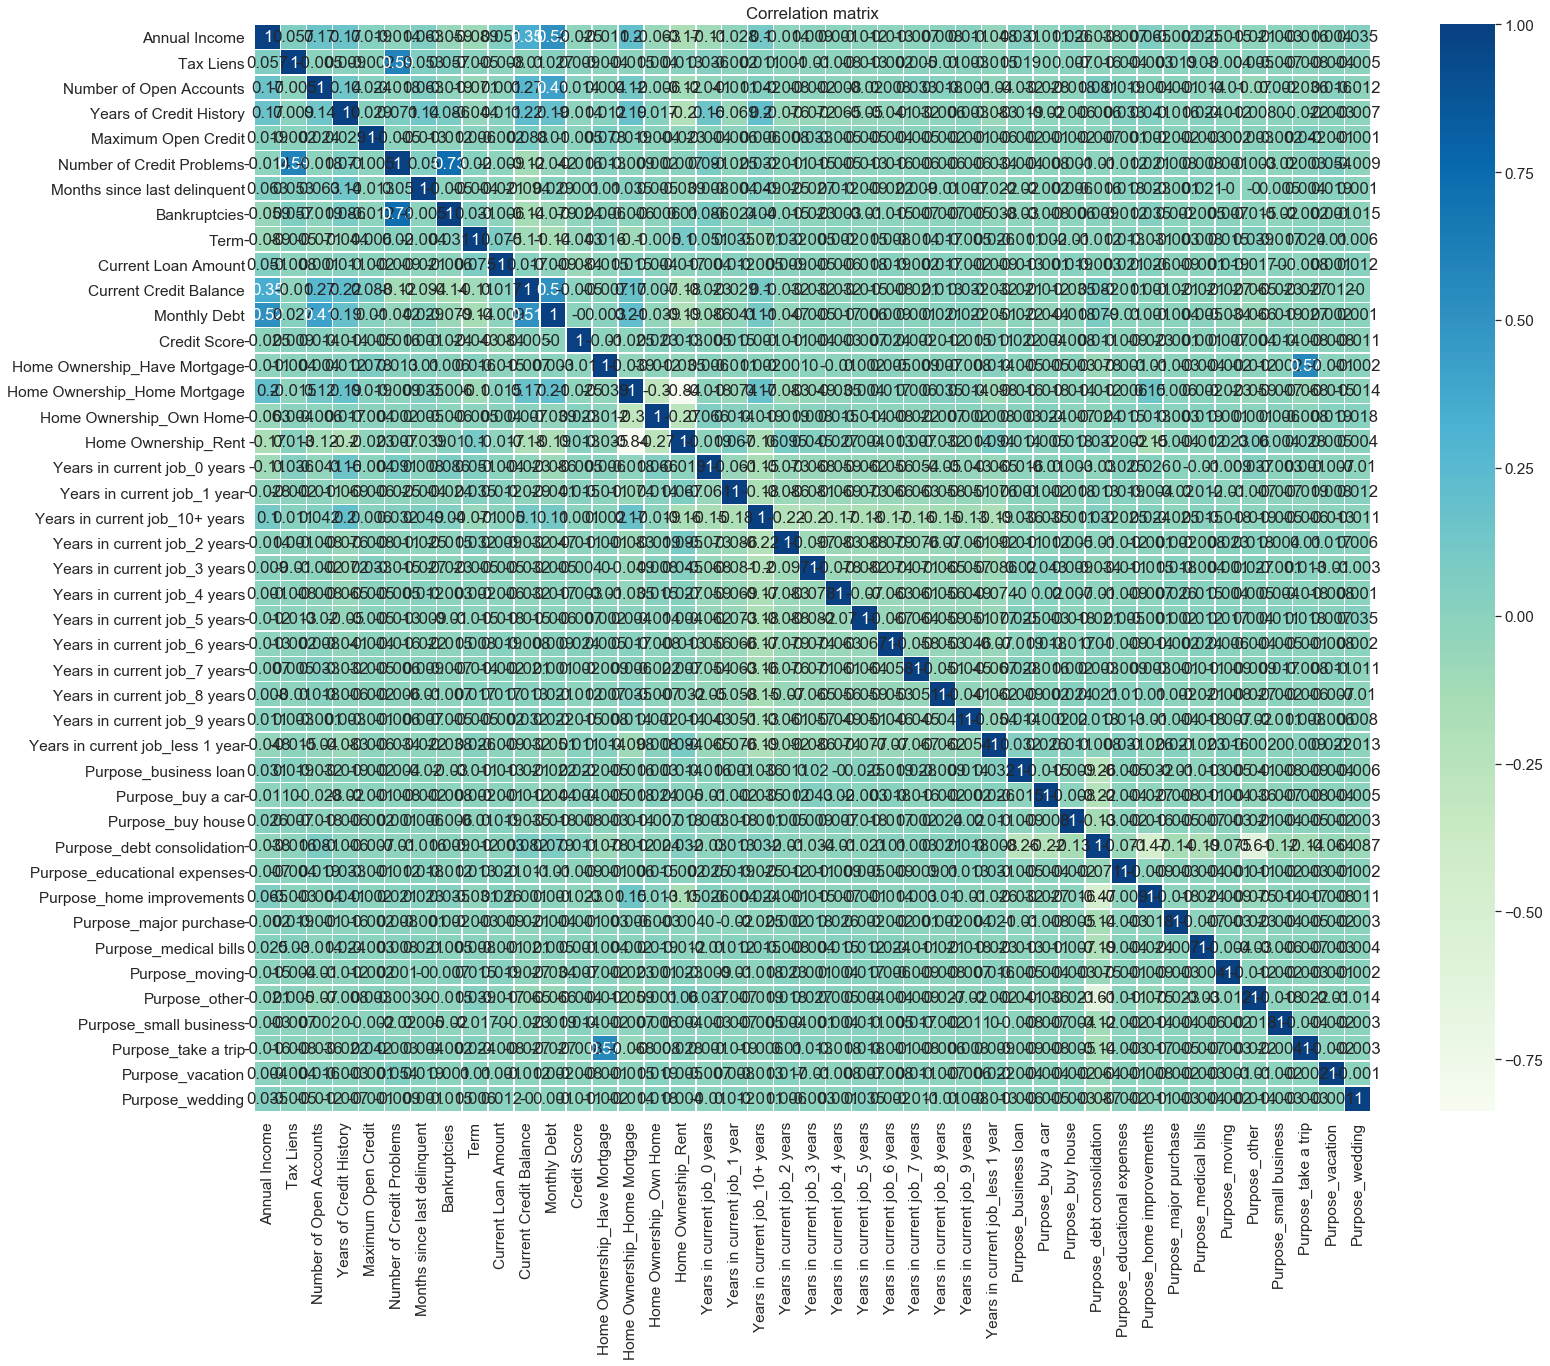

In [107]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df_train[BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

### Обзор признака Credit_Score<a class="anchor" id="score"></a>

**Так как самые значимые признак это Credit Score, рассмотрим его поподробнее**

In [108]:
df_train['Credit Score'].describe()

count    7500.000000
mean     1063.877333
std      1438.335832
min       585.000000
25%       718.000000
50%       731.000000
75%       740.000000
max      7510.000000
Name: Credit Score, dtype: float64

**Так как Credit Score содержит значения до 1000 и более 6000, а между ними ничего, рассмотрим неколько интералов**

(600, 770)

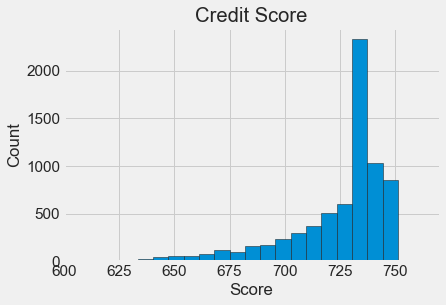

In [109]:
plt.style.use('fivethirtyeight')
plt.hist(df_train['Credit Score'], edgecolor = 'k', bins = 1000)
plt.title('Credit Score'); plt.xlabel('Score'); plt.ylabel('Count');
plt.xlim([600, 770])

(0, 80)

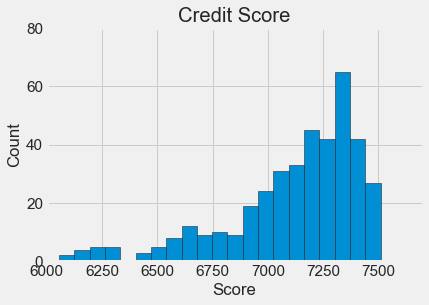

In [110]:
plt.style.use('fivethirtyeight')
plt.hist(df_train['Credit Score'], edgecolor = 'k', bins = 100)
plt.title('Credit Score'); plt.xlabel('Score'); plt.ylabel('Count');
plt.xlim([6000, 7700])
plt.ylim([0, 80])

(500, 800)

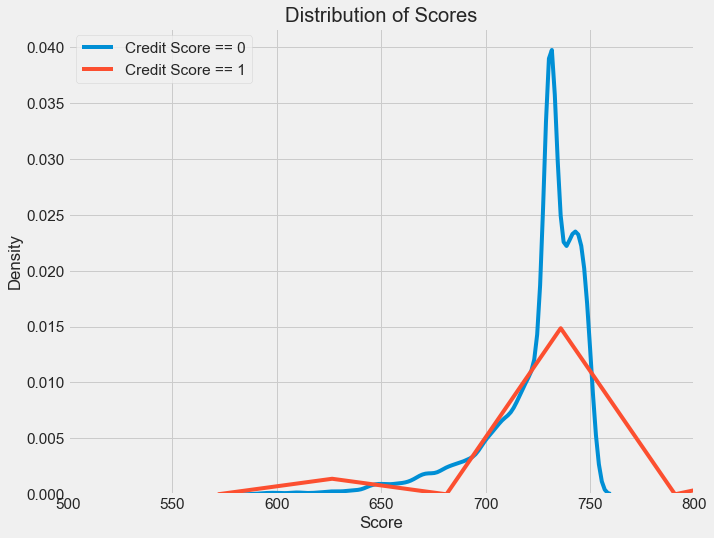

In [111]:
plt.figure(figsize = (10, 8))
sns.kdeplot(df_train.loc[df_train['Credit Default'] == 0, 'Credit Score'], label = 'Credit Score == 0')
sns.kdeplot(df_train.loc[df_train['Credit Default'] == 1, 'Credit Score'], label = 'Credit Score == 1')
plt.xlabel('Score'); plt.ylabel('Density'); plt.title('Distribution of Scores')
plt.xlim([500, 800])

**При этом аномальное значение Credit Score выглядят так**

(0.0, 0.001)

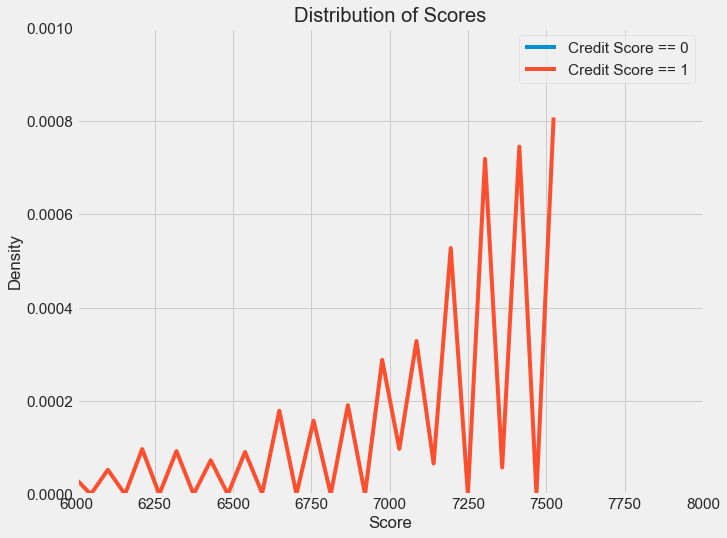

In [112]:
plt.figure(figsize = (10, 8))
sns.kdeplot(df_train.loc[df_train['Credit Default'] == 0, 'Credit Score'], label = 'Credit Score == 0')
sns.kdeplot(df_train.loc[df_train['Credit Default'] == 1, 'Credit Score'], label = 'Credit Score == 1')
plt.xlabel('Score'); plt.ylabel('Density'); plt.title('Distribution of Scores')
plt.xlim([6000, 8000])
plt.ylim([0.000, 0.001])

In [113]:
score_data = df_train[['Credit Default', 'Credit Score']]
score_data['Score_BINNED'] = pd.cut(score_data['Credit Score'], bins = np.linspace(585, 755, num = 10))
score_data.head(10)

<ipython-input-113-d7a9bacd1950>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_data['Score_BINNED'] = pd.cut(score_data['Credit Score'], bins = np.linspace(585, 755, num = 10))


,Credit Default,Credit Score,Score_BINNED
0,0,749.0,"(736.111, 755.0]"
1,1,737.0,"(736.111, 755.0]"
2,0,742.0,"(736.111, 755.0]"
3,0,694.0,"(679.444, 698.333]"
4,0,719.0,"(717.222, 736.111]"
5,1,731.0,"(717.222, 736.111]"
6,0,745.0,"(736.111, 755.0]"
7,1,705.0,"(698.333, 717.222]"
8,0,731.0,"(717.222, 736.111]"
9,1,731.0,"(717.222, 736.111]"


In [114]:
score_groups  = score_data.groupby('Score_BINNED').mean()
score_groups
# можно сюда добавить и score , которые выражены в тысячах,но они все невозвратные поэтому не буду

,Credit Default,Credit Score
Score_BINNED,,
"(585.0, 603.889]",0.470588,595.000000
"(603.889, 622.778]",0.588235,614.235294
"(622.778, 641.667]",0.442308,632.865385
"(641.667, 660.556]",0.367347,651.680272
"(660.556, 679.444]",0.378378,670.949807
"(679.444, 698.333]",0.321739,689.778261
"(698.333, 717.222]",0.220944,708.993096
"(717.222, 736.111]",0.278138,729.357077
"(736.111, 755.0]",0.132309,743.437066


Text(0.5, 1.0, 'Failure to Repay by Score Group')

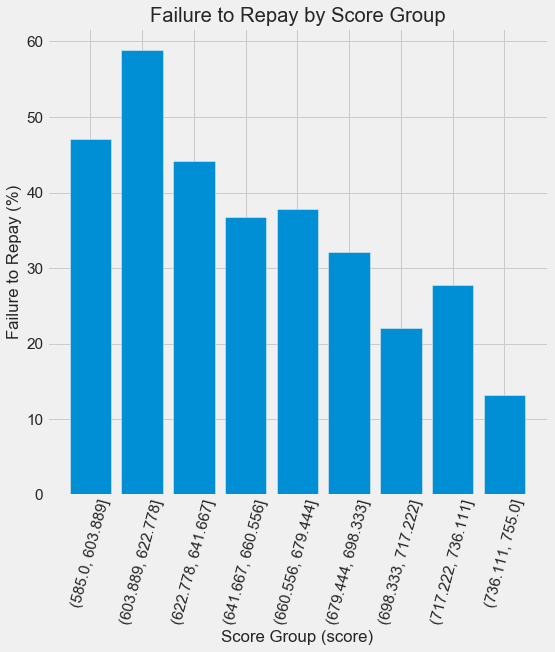

In [115]:
plt.figure(figsize = (8, 8))

plt.bar(score_groups.index.astype(str), 100 * score_groups['Credit Default'])

plt.xticks(rotation = 75); plt.xlabel('Score Group (score)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Score Group')

### Подготовка данных к моделированию, скалирование <a class="anchor" id="scal"></a>

In [116]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Term,Current Loan Amount,...,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Credit Default
count,7.500000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,...,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.00000,7500.000000
mean,1.325286e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,0.455867,0.116933,0.740800,1.187318e+07,...,0.054933,0.005333,0.009467,0.001467,0.088667,0.003467,0.004933,0.001067,0.00200,0.281733
std,7.567551e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,0.498082,0.346904,0.438225,3.192612e+07,...,0.227865,0.072840,0.096842,0.038272,0.284281,0.058780,0.070069,0.032645,0.04468,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.124200e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,9.311330e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,0.000000,0.000000,0.000000,1.801690e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,0.000000,0.000000,1.000000,3.095730e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,1.499974e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,1.000000,0.000000,1.000000,5.198820e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,1.000000,4.000000,1.000000,1.000000e+08,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [117]:
scaler = StandardScaler()

In [118]:
df_norm = df_train.copy()

In [119]:
NUM_Features = ['Annual Income', 'Tax Liens', 'Number of Open Accounts',
       'Years of Credit History', 'Maximum Open Credit',
       'Number of Credit Problems', 'Months since last delinquent',
       'Bankruptcies', 'Term', 'Current Loan Amount', 'Current Credit Balance',
       'Monthly Debt', 'Credit Score']

In [120]:
df_norm[NUM_Features] = scaler.fit_transform(df_norm[NUM_Features])

In [121]:
df_work_train = df_norm.copy()
df_work_train

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Term,Current Loan Amount,...,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Credit Default
0,-1.114304,-0.110953,-0.026674,1.133645,-0.016174,1.664779,-0.915306,2.545732,0.591517,2.760520,...,0,0,0,0,0,0,0,0,0,0
1,-0.396190,-0.110953,0.788223,-0.428528,0.014763,-0.340979,-0.915306,-0.337099,-1.690569,-0.363620,...,0,0,0,0,0,0,0,0,0,1
2,-0.758385,-0.110953,-0.026674,2.369181,0.014807,-0.340979,-0.915306,-0.337099,0.591517,2.760520,...,0,0,0,0,0,0,0,0,0,0
3,-0.687478,-0.110953,-0.637847,0.593985,-0.049781,1.664779,-0.915306,2.545732,0.591517,-0.368118,...,0,0,0,0,0,0,0,0,0,0
4,-0.725543,-0.110953,0.380774,-0.669954,-0.034902,1.664779,-0.915306,-0.337099,0.591517,-0.367978,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,-1.219886,-0.110953,-1.656468,-1.394234,-0.052248,-0.340979,-0.915306,-0.337099,0.591517,-0.367868,...,0,0,0,0,1,0,0,0,0,0
7496,0.275799,-0.110953,-0.230398,1.162048,-0.016152,-0.340979,1.092531,-0.337099,-1.690569,-0.358011,...,0,0,0,0,0,0,0,0,0,1
7497,0.731625,-0.110953,0.177050,1.957336,0.052029,-0.340979,-0.915306,-0.337099,0.591517,2.760520,...,0,0,0,0,0,0,0,0,0,0
7498,-0.207346,-0.110953,2.010568,1.162048,0.012237,-0.340979,-0.915306,-0.337099,0.591517,-0.352647,...,0,0,0,0,0,0,0,0,0,0


**Разбиение на train и test**

In [122]:
TARGET_NAME = 'Credit Default'

In [123]:
FEATURES = df_work_train.columns.drop(TARGET_NAME).tolist()

In [124]:
X = df_work_train[FEATURES]
X

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Term,Current Loan Amount,...,Purpose_educational expenses,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding
0,-1.114304,-0.110953,-0.026674,1.133645,-0.016174,1.664779,-0.915306,2.545732,0.591517,2.760520,...,0,0,0,0,0,0,0,0,0,0
1,-0.396190,-0.110953,0.788223,-0.428528,0.014763,-0.340979,-0.915306,-0.337099,-1.690569,-0.363620,...,0,0,0,0,0,0,0,0,0,0
2,-0.758385,-0.110953,-0.026674,2.369181,0.014807,-0.340979,-0.915306,-0.337099,0.591517,2.760520,...,0,0,0,0,0,0,0,0,0,0
3,-0.687478,-0.110953,-0.637847,0.593985,-0.049781,1.664779,-0.915306,2.545732,0.591517,-0.368118,...,0,0,0,0,0,0,0,0,0,0
4,-0.725543,-0.110953,0.380774,-0.669954,-0.034902,1.664779,-0.915306,-0.337099,0.591517,-0.367978,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,-1.219886,-0.110953,-1.656468,-1.394234,-0.052248,-0.340979,-0.915306,-0.337099,0.591517,-0.367868,...,0,0,0,0,0,1,0,0,0,0
7496,0.275799,-0.110953,-0.230398,1.162048,-0.016152,-0.340979,1.092531,-0.337099,-1.690569,-0.358011,...,0,0,0,0,0,0,0,0,0,0
7497,0.731625,-0.110953,0.177050,1.957336,0.052029,-0.340979,-0.915306,-0.337099,0.591517,2.760520,...,0,0,0,0,0,0,0,0,0,0
7498,-0.207346,-0.110953,2.010568,1.162048,0.012237,-0.340979,-0.915306,-0.337099,0.591517,-0.352647,...,0,0,0,0,0,0,0,0,0,0


In [125]:
y = df_work_train[TARGET_NAME]
y

0       0
1       1
2       0
3       0
4       0
       ..
7495    0
7496    1
7497    0
7498    0
7499    0
Name: Credit Default, Length: 7500, dtype: int64

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.33)

In [127]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [128]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [129]:
#X.to_csv('X.csv', index=False)

In [130]:
#y.to_csv('y.csv', index=False)

**Балансировка целевой переменной**

In [131]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

0    3602
1    2846
Name: Credit Default, dtype: int64

In [132]:
X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

### Построение и оценка базовых моделей <a class="anchor" id="model"></a>

**Логистическая регрессия**

In [133]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.69      0.82      0.75      3602
           1       0.71      0.53      0.61      2846

    accuracy                           0.70      6448
   macro avg       0.70      0.68      0.68      6448
weighted avg       0.70      0.70      0.69      6448

TEST

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1785
           1       0.53      0.51      0.52       690

    accuracy                           0.74      2475
   macro avg       0.67      0.67      0.67      2475
weighted avg       0.73      0.74      0.73      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1470  315
1                339  351


c:\users\пк\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**k ближайших соседей**

In [134]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_train_pred = model_knn.predict(X_train)
y_test_pred = model_knn.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      3602
           1       0.80      0.72      0.76      2846

    accuracy                           0.80      6448
   macro avg       0.80      0.79      0.79      6448
weighted avg       0.80      0.80      0.80      6448

TEST

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1785
           1       0.45      0.47      0.46       690

    accuracy                           0.69      2475
   macro avg       0.62      0.62      0.62      2475
weighted avg       0.69      0.69      0.69      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1384  401
1                367  323


**Бустинговые алгоритмы**


*XGBoost*

In [152]:
model_xgb = xgb.XGBClassifier(random_state=1) 
model_xgb.fit(X_train, y_train)

y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)


TRAIN

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3602
           1       0.98      0.97      0.97      2846

    accuracy                           0.98      6448
   macro avg       0.98      0.98      0.98      6448
weighted avg       0.98      0.98      0.98      6448

TEST

              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1785
           1       0.51      0.44      0.47       690

    accuracy                           0.73      2475
   macro avg       0.65      0.64      0.64      2475
weighted avg       0.72      0.73      0.72      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1498  287
1                387  303


*LightGBM*

In [136]:
model_lgbm = lgbm.LGBMClassifier(random_state=21)
model_lgbm.fit(X_train, y_train)

y_train_pred = model_lgbm.predict(X_train)
y_test_pred = model_lgbm.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3602
           1       0.95      0.90      0.92      2846

    accuracy                           0.93      6448
   macro avg       0.94      0.93      0.93      6448
weighted avg       0.93      0.93      0.93      6448

TEST

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1785
           1       0.55      0.46      0.50       690

    accuracy                           0.74      2475
   macro avg       0.67      0.66      0.66      2475
weighted avg       0.73      0.74      0.74      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1520  265
1                372  318


*CatBoost*

In [137]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3602
           1       0.93      0.86      0.89      2846

    accuracy                           0.91      6448
   macro avg       0.91      0.91      0.91      6448
weighted avg       0.91      0.91      0.91      6448

TEST

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1785
           1       0.55      0.47      0.51       690

    accuracy                           0.75      2475
   macro avg       0.68      0.66      0.67      2475
weighted avg       0.73      0.75      0.74      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1524  261
1                368  322


### Выбор лучшей модели и подбор гиперпараметров <a class="anchor" id="best"></a>

In [182]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin

In [183]:
def hyperopt_xgb_score(params):
    clf = xgb.XGBClassifier(**params)
    # усреднение по 3ем фолдам, для уменьшения влияния стахостичности
    # для ускорения можно использовать train_test_split один раз
    current_score = cross_val_score(clf, X, y, cv=3).mean()
    print(current_score, params)
    return -current_score
 

In [184]:
simple_space_xgb = {
            'n_estimators': hp.choice('n_estimators', range(100, 1000)),
            'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
            'max_depth':  hp.choice('max_depth', np.arange(1, 14, dtype=int)),
}

In [185]:
best = fmin(fn=hyperopt_xgb_score, space=simple_space_xgb, algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

0.762                                                                                                                  
{'eta': 0.17500000000000002, 'max_depth': 2, 'n_estimators': 918}                                                      
0.7488                                                                                                                 
{'eta': 0.325, 'max_depth': 13, 'n_estimators': 736}                                                                   
0.7422666666666666                                                                                                     
{'eta': 0.30000000000000004, 'max_depth': 4, 'n_estimators': 696}                                                      
0.7435999999999999                                                                                                     
{'eta': 0.375, 'max_depth': 8, 'n_estimators': 499}                                                                    
0.7488                                  

In [191]:
model_xgb = xgb.XGBClassifier(random_state = 21, max_depth=3, eta = 0.2, colsample_bytree = 0.55,
                            gamma=0.7, min_child_weight=2.0, n_estimators=150) 
model_xgb.fit(X_train, y_train)

y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      3602
           1       0.83      0.71      0.77      2846

    accuracy                           0.81      6448
   macro avg       0.81      0.80      0.80      6448
weighted avg       0.81      0.81      0.81      6448

TEST

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1785
           1       0.53      0.50      0.52       690

    accuracy                           0.74      2475
   macro avg       0.67      0.67      0.67      2475
weighted avg       0.73      0.74      0.74      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1480  305
1                342  348


In [173]:
#более мощный space
space_xgb2 = {
            'n_estimators': hp.choice('n_estimators', range(50, 1000)),
            'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
            'max_depth':  hp.choice('max_depth', np.arange(1, 14, dtype=int)),
            'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
            'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
            'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
            'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
            'eval_metric': 'auc',
            'objective': 'binary:logistic',
            # Increase this number if you have more cores. Otherwise, remove it and it will default
            # to the maxium number.
            'nthread': 4,
            'booster': 'gbtree',
            'tree_method': 'exact',
            'silent': 1
        }

In [174]:
best = fmin(fn=hyperopt_xgb_score, space=space_xgb2, algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

nan                                                                                                                    
{'booster': 'gbtree', 'colsample_bytree': 0.65, 'eta': 0.25, 'eval_metric': 'f1', 'gamma': 0.55, 'max_depth': 13, 'min_child_weight': 5.0, 'n_estimators': 174, 'nthread': 4, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.6000000000000001, 'tree_method': 'exact'}
 10%|██████▍                                                         | 1/10 [00:00<00:01,  7.86trial/s, best loss: nan]

c:\users\пк\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [15:39:52] C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\metric\metric.cc:31: Unknown metric function f1

  warnings.warn("Estimator fit failed. The score on this train-test"



nan                                                                                                                    
{'booster': 'gbtree', 'colsample_bytree': 1.0, 'eta': 0.1, 'eval_metric': 'f1', 'gamma': 1.0, 'max_depth': 1, 'min_child_weight': 5.0, 'n_estimators': 911, 'nthread': 4, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.8, 'tree_method': 'exact'}
nan                                                                                                                    
{'booster': 'gbtree', 'colsample_bytree': 0.55, 'eta': 0.2, 'eval_metric': 'f1', 'gamma': 0.65, 'max_depth': 2, 'min_child_weight': 3.0, 'n_estimators': 924, 'nthread': 4, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.55, 'tree_method': 'exact'}
 30%|███████████████████▏                                            | 3/10 [00:00<00:01,  6.21trial/s, best loss: nan]

c:\users\пк\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [15:39:52] C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\metric\metric.cc:31: Unknown metric function f1

  warnings.warn("Estimator fit failed. The score on this train-test"

c:\users\пк\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [15:39:52] C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\metric\metric.cc:31: Unknown metric function f1

  warnings.warn("Estimator fit failed. The score on this train-test"



nan                                                                                                                    
{'booster': 'gbtree', 'colsample_bytree': 0.8, 'eta': 0.05, 'eval_metric': 'f1', 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 5.0, 'n_estimators': 523, 'nthread': 4, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.6000000000000001, 'tree_method': 'exact'}
nan                                                                                                                    
{'booster': 'gbtree', 'colsample_bytree': 0.9, 'eta': 0.025, 'eval_metric': 'f1', 'gamma': 0.9500000000000001, 'max_depth': 13, 'min_child_weight': 1.0, 'n_estimators': 133, 'nthread': 4, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.9500000000000001, 'tree_method': 'exact'}
 50%|████████████████████████████████                                | 5/10 [00:00<00:00,  6.70trial/s, best loss: nan]

c:\users\пк\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [15:39:52] C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\metric\metric.cc:31: Unknown metric function f1

  warnings.warn("Estimator fit failed. The score on this train-test"

c:\users\пк\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [15:39:52] C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\metric\metric.cc:31: Unknown metric function f1

  warnings.warn("Estimator fit failed. The score on this train-test"



nan                                                                                                                    
{'booster': 'gbtree', 'colsample_bytree': 0.8, 'eta': 0.35000000000000003, 'eval_metric': 'f1', 'gamma': 0.65, 'max_depth': 1, 'min_child_weight': 1.0, 'n_estimators': 915, 'nthread': 4, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.65, 'tree_method': 'exact'}
nan                                                                                                                    
{'booster': 'gbtree', 'colsample_bytree': 0.6000000000000001, 'eta': 0.35000000000000003, 'eval_metric': 'f1', 'gamma': 0.5, 'max_depth': 7, 'min_child_weight': 5.0, 'n_estimators': 719, 'nthread': 4, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.65, 'tree_method': 'exact'}
 70%|████████████████████████████████████████████▊                   | 7/10 [00:01<00:00,  5.90trial/s, best loss: nan]

c:\users\пк\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [15:39:53] C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\metric\metric.cc:31: Unknown metric function f1

  warnings.warn("Estimator fit failed. The score on this train-test"

c:\users\пк\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [15:39:53] C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\metric\metric.cc:31: Unknown metric function f1

  warnings.warn("Estimator fit failed. The score on this train-test"



nan                                                                                                                    
{'booster': 'gbtree', 'colsample_bytree': 0.6000000000000001, 'eta': 0.325, 'eval_metric': 'f1', 'gamma': 0.5, 'max_depth': 10, 'min_child_weight': 6.0, 'n_estimators': 87, 'nthread': 4, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.9, 'tree_method': 'exact'}
nan                                                                                                                    
                                                                                                                       

c:\users\пк\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [15:39:53] C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\metric\metric.cc:31: Unknown metric function f1

  warnings.warn("Estimator fit failed. The score on this train-test"

c:\users\пк\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [15:39:53] C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\metric\metric.cc:31: Unknown metric function f1

  warnings.warn("Estimator fit failed. The score on this train-test"



{'booster': 'gbtree', 'colsample_bytree': 1.0, 'eta': 0.325, 'eval_metric': 'f1', 'gamma': 0.55, 'max_depth': 11, 'min_child_weight': 2.0, 'n_estimators': 483, 'nthread': 4, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.65, 'tree_method': 'exact'}
nan                                                                                                                    
{'booster': 'gbtree', 'colsample_bytree': 0.8500000000000001, 'eta': 0.375, 'eval_metric': 'f1', 'gamma': 0.9500000000000001, 'max_depth': 5, 'min_child_weight': 5.0, 'n_estimators': 60, 'nthread': 4, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.8, 'tree_method': 'exact'}
100%|███████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.75trial/s, best loss: nan]


c:\users\пк\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: [15:39:53] C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\metric\metric.cc:31: Unknown metric function f1

  warnings.warn("Estimator fit failed. The score on this train-test"



AllTrialsFailed: 

In [172]:
model_xgb = xgb.XGBClassifier(random_state = 21, eta = 0.3, colsample_bytree = 0.55,
                            gamma=0.7, min_child_weight=2.0, n_estimators=100) 
model_xgb.fit(X_train, y_train)

y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3602
           1       0.96      0.96      0.96      2846

    accuracy                           0.96      6448
   macro avg       0.96      0.96      0.96      6448
weighted avg       0.96      0.96      0.96      6448

TEST

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1785
           1       0.53      0.49      0.51       690

    accuracy                           0.73      2475
   macro avg       0.67      0.66      0.66      2475
weighted avg       0.73      0.73      0.73      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1482  303
1                354  336


In [176]:
params = {'n_estimators':[50, 100, 200, 500, 700, 1000, 1200, 1500],
          'max_depth':[3, 5, 7]}

In [177]:
cv=KFold(n_splits=3, random_state=21, shuffle=True)

In [178]:
%%time

rs = RandomizedSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(X, y)

Wall time: 3min 20s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
                   error_score=nan,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000027F25B76E50>,
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200, 500, 700,
                                                         1000, 1200, 1500]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='f1', verbose=0)

In [179]:
rs.best_params_

{'n_estimators': 1200, 'max_depth': 7}

In [180]:
rs.best_score_

0.4506562625879525

In [181]:
%%time

final_model = catb.CatBoostClassifier(n_estimators=1200, max_depth=7,
                                      silent=True, random_state=21)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3602
           1       0.97      0.93      0.95      2846

    accuracy                           0.96      6448
   macro avg       0.96      0.96      0.96      6448
weighted avg       0.96      0.96      0.96      6448

TEST

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1785
           1       0.57      0.44      0.49       690

    accuracy                           0.75      2475
   macro avg       0.68      0.65      0.66      2475
weighted avg       0.74      0.75      0.74      2475

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1557  228
1                389  301
Wall time: 10.1 s
